# HW02: $K$-means clustering

# A.Background: Clustering and Clustering objective

### CAVEAT: You should not modify any code in this section. Just run every code block in this section so that you can use the 
### variable *'X'* that contains our toy dataset.
### However, please understand the codes of this section so that you can find it useful and utilize this in the future.

---



### Clustering
- Suppose we have $N$ (the number of total vectors/data) $n$ (the dimension of each vector/data), $\mathbf{x}_1, ..., \mathbf{x}_N$.
- Goal of clustering is to group the vectors into $k$ clusters. (Normally, $k \ll N$)

*Suppose we have the following data, with $N=300$, $2$ dim vectors*

In [24]:
# 0. create and visualize our toy dataset.
# import necessary modules for this homework 
import numpy as np
import matplotlib.pyplot as plt

# define toy data points as variable 'X' (vectors)
X = np.concatenate(
    [[.3 * np.random.randn(2) for i in range(100)], # N1=100 2-dim vectors, sampled from Normal distribution centered @ (0, 0), scaled by 0.3 
     [np.array([1,1]) + .3 * np.random.randn(2) for i in range(100)], # N2=100 2-dim vectors, Normal distribution centered @ (1, 1), scaled by 0.3
     [np.array([1,-1]) + .3 * np.random.randn(2) for i in range(100)]] # N3=100 2-dim vectors, Normal distribution centered @ (1, -1), scaled by 0.3
, axis=0) # We concatenate(merge) N1,N2, N3 vectors (each has shape (100, 2)) into (300, 2); since
X.shape # (300, 2) = (N, n) 


(300, 2)

((-1.5, 2.5), (-2.0, 2.0))

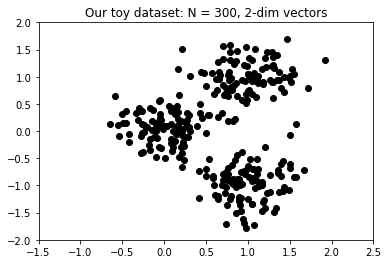

In [25]:
plt.scatter([x[0] for x in X],[x[1] for x in X], color='k') # scatter each dimension of data vector for each X, Y axis
plt.title("Our toy dataset: N = 300, 2-dim vectors")
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*Above is our toy dataset to cluster in the Problem 1 to 3.*

*By our intuition, we can expect there are $k = 3$ clusters.
Thus, in our imagination, the clusters may look like...*

((-1.5, 2.5), (-2.0, 2.0))

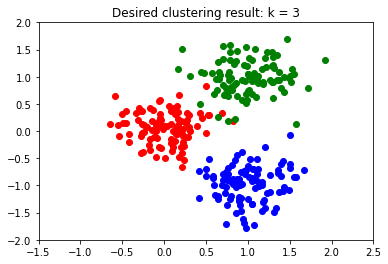

In [26]:
plt.scatter([x[0] for x in X[:100]],[x[1] for x in X[:100]], color='r') # first cluster as red
plt.scatter([x[0] for x in X[100:200]],[x[1] for x in X[100:200]], color='g') # second cluster as green
plt.scatter([x[0] for x in X[200:300]],[x[1] for x in X[200:300]], color='b') # third cluster as blue
plt.title("Desired clustering result: k = 3")
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*Since you've successfully understood (hopefully) all the contents we studied in Chapter 4 of our course,
now it's your turn to implement the $K$-means clustering algorithm **by your hand!** *

*In this homework, you will be asked to* (The notation follows that in the textbook and the course note) 
- First test your $K$-means algorithm with *Euclidean distance (Frobenius norm)* on the toy dataset **X** defined in the code block above

- Visualize the clustered result with two different values of $k = 2, 3$
- Then, change the distance metric in clustering objective from *Frobenius norm* $\lVert \mathbf{x_i} - \mathbf{z_{c_i}} \rVert_2$ to
**angle between two vectors**, i.e., $\arccos(\frac{\mathbf{x_i}^\top \mathbf{z_{c_i}}}{\lVert\mathbf{x_i}\rVert_2 \lVert\mathbf{z_{c_i}}\rVert_2} )$

- But, we'll actually use the cosine similiarity $(\frac{\mathbf{x_i} \cdot \mathbf{z_{c_i}}}{\lVert\mathbf{x_i}\rVert_2 \lVert\mathbf{z_{c_i}}\rVert_2})$ for better convergence 
- Finally, test your algorithm on the well-renowned MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database).

*From the lecture, we studied the pseudo-code for the actual implementation of $K$ means as follows.*

### *pseudo-code* for $K$-Means clustering
___

given a list of $N$ vectors $\mathbf{x_1}, ..., \mathbf{x}_N$, and an initial list of $k$ groups representative
vectors $\mathbf{z}_1, ..., \mathbf{z}_k$

The group representatives can be created by first randomly grouping vectors and 
then creating mean vectors to be used as representatives.

If the vectors (data points) and the group representatives are defined,


repeat until covergence

1. Partition the vectors into k groups. For each vector $i = 1, ..., N,$ assign $\mathbf{x}_i$ to the 
    group associated with the nearest representative.
2. Update representatives. For each group $j = 1, ..., k,$ set $\mathbf{z}_j$ to be the mean of the
    vectors in group $j$.
___

# B.Main functions: Main functions for implementing *K*-means algorithm


### CAVEAT: *Skeleton code incudes a usage of Python's list comprehension (LC).*
- You should get familar with this concept to understand the skeletal code and utilize afterwards.
Please refer to the following link if you're not familiar with the LC.

- https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

___
*Below is the main codes for implementing our K-means algorithm.*

### Modification (09/16): For better convergence, please implement the angle() function as consine similiarity (i.e. w/o $\arccos$). 
 $(\frac{\mathbf{x_i} \cdot \mathbf{z_{c_i}}}{\lVert\mathbf{x_i}\rVert_2 \lVert\mathbf{z_{c_i}}\rVert_2})$

In [55]:
# define the global learning variables for interation.
MAX_ITERS = 100
TOLERANCE = 1e-4

# don't modify this function
def plt_dynamic(x, y, ax, colors=['b']):
    # Plot the clustered data.
    for color in colors:
        ax.plot(x, y, color)

# define distance metrics
def norm(v):
    """
    Compute the Frobenious norm (Euclidean norm) of given vector
    :param v: the vector to compute its norm.
    :return: the norm of vector v.
    """
    return np.sqrt(v.dot(v))
    """ Problem #1; Fill in here."""

def angle(x, z):
    """
    Get the angle between two vectors x and z.
    :param x: the vector of single data point.
    :param z: the vector of representative of each cluster k.
    :return: the angle (< pi) between two vectors x and z.
    """
    return np.dot(x,z)/(np.sqrt(x.dot(x))*np.sqrt(z.dot(z)))
    

# define our main K-means cluster function
def kmeans(X, k, metric='angle'):
    """
    Cluster the given data 'X' into 'k' clusters, using the 'metric'
    :param X: X in Numpy array of shape [Num of data, Vector dim], 
    :param k: the vector of representative of each cluster k.
    :param metric: the type of clustering metric. 'frobenius' / 'angle'.
    :return: list that contains each data's cluster assignment of length N and k class representative vectors 
    """
    N = X.shape[0] # amount of vectors
    print("Total number of datapoints is:", N)
    n = X.shape[1] # dimension of each vector
    print("dimension of each data is:", n)
    # define dummy variables to store clustering info.
    distances = np.zeros(N) # stores distances of each point to the nearest representative
    jPrev = np.Inf # prvious cost function for ending criterion
    reps = [np.zeros(n) for j in range(k)] # create the representative variables

    costs = [] # for the visualization of cost function
    iters = [] # for the visualization of cost function

    # for each datapoint of N, randomly assign the group index as an integer 0, ..., k-1
    # Hint: refer to Python's list comprehension feature (LC) and use method under numpy.random module.
    assignment = [ np.random.randint(0,k) for i in range(N)] 
    
    # actual K-means algorithm
    itr_last = 0 # the last iteration index
    for itr in range(MAX_ITERS): # iterate over 'MAX_ITERS'
        
        for j in range(k): # iterate over k representatives 

            # collect the indicies in variable 'assignment' that corresponds to each group j = 0, 1, ..., k - 1. 
            # Hint: you may choose one of the two expression below.
            #group = [i for i in range(N) if j==assignment[i]] 
            group = []
            for i in range(N):
                if j==assignment[i]:
                    group.append(i)

            # update the representative vector data for each group j 'reps[j]' as the mean vector of each group's data points.
            # Hint: you can use the numpy indexing, using the indices as Python list.
            reps[j] = np.mean(X[group], axis=0) # update representative as the mean of datapoint for each class

        for i in range(0, N) : # iterate over the number of whole data points
           
            # (distance and index)
            # compute distance between each data point x[i] and representatives reps[j], and save to the list.
            # Hint: complete the 'norm()' method (for Problem1) and 'angle()' (for Problem2) and utilize. 
            if metric == 'frobenius':
                measure = [norm(X[i]-reps[j]) for j in range(k)]
            elif metric == 'angle':
                measure = [angle(X[i],reps[j]) for j in range(k)]
            else:
                raise ValueError("This metric is not supported.")
            
            # Hint: you can use numpy module's method that returns minimum value and index of given list.
            distances[i] = np.min(measure,axis=0) # get the smallest distance among k measurements
            assignment[i] = np.argmin(measure,axis=0) # get the cluster assignment of corresponding smallest measurement
            
            
        # compute the clustering objective
        # Hint: you can use the 'distances' to compute the cost (09/16)
        J =  np.mean(distances**2)
        
        # Exception handling
        if np.isnan(J) or np.isinf(J):
            raise ValueError("Loss is Nan or Inf! Stopping the iteration...")

        # Append cost and the index of iteration for visualization
        costs.append(J)
        iters.append(itr)

        # let's make log
        if itr < 10:
            print("Iter: " + str(itr) + " Cost: " + str(J))
        elif itr >= 10 and itr % 10 == 0:
            print("Iter: " + str(itr) + " Cost: " + str(J))

        # if error criterion satisfied, let's get out of the loop.
        if (itr > 1) and (abs(J-jPrev)) < (TOLERANCE * J):
            itr_last = itr
            break

        # end the loop if we couldn't satisfy the criterion before the max iterations.
        if itr == MAX_ITERS - 1:
            itr_last = itr
            print("Reached max iteration, but could not satisfy the tolerance.")
        
        # update the jPrev to compute the error for the next iteration
        jPrev = J

    # draw the plot for Cost per iteration. You should get familiar with the Matplotlib.
    fig, ax = plt.subplots(1,1)
    ax.set_title('K-Means cost over iterations')
    ax.set_xlabel('Iterations') ; ax.set_ylabel('Cost')
    ax.set_xlim(0, itr_last) ; ax.set_ylim(np.min(costs), np.max(costs))
    plt_dynamic(iters, costs, ax, 'ro')
    
    # return the list of assignments and representatives
    return assignment, reps

# C.Run and visualzie algorithm

### CAVEAT: You shoud group the dataset variable *X* according to the cluster assignment returned my our *kmeans()* function. 
- Once you successfully implement the call of *kmeans()* function and grouping out the data into the list *groups* below, everything is just 
repeatition of it.
---
*Let's call our function kmeans() by giving proper arguments of data, cluster, and the metric.*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.9147250479104219
Iter: 1 Cost: 0.5077094540914516
Iter: 2 Cost: 0.5071665881592128
Iter: 3 Cost: 0.5067231723362138
Iter: 4 Cost: 0.5064210075073431
Iter: 5 Cost: 0.5063472386438
Iter: 6 Cost: 0.5063472386438


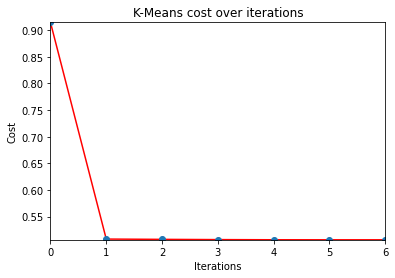

In [93]:
k = 2
# test with frobenius metric
# call the kmeans() function by parsing our toy data 'X', the # of clusters 'k',
# and flag we're using Frobenious norm as metric.
assignment, reps = kmeans(X, k, metric='frobenius')

*We see the decrease of the cost function.*

*Then, let's visualize our result for $k=2$*

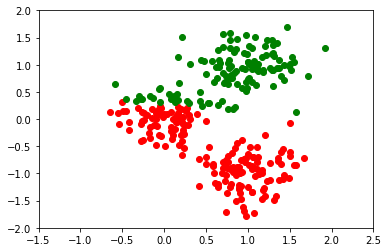

In [94]:

# create a list that consists of lists that contains data points 'X' for each clustering group j = 0, 1, ... k.
# Hint: You can either implement in list comprehension or normal for loop
# Option 1: Fill out the list comprehension form
#groups = [""" Problem #2; Fill in here. """ for i in range(len(X)) if assignment[i] == """ Problem #2; Fill in here. """] for j in range(k)]

# Option 2: Or this normal for loop statement
groups = [] # list for the whole groups of length k
for j in range(k):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignment)):
        if assignment[i] == j :
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

# plot the result.
plt.scatter([c[0] for c in groups[0]], [c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]], [c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*We can see that our data points somehow clustered into two groups!*

*Now, what if we assume there are three representatives? i.e. $k=3$*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.8828203478503532
Iter: 1 Cost: 0.23191549952429122
Iter: 2 Cost: 0.18014627968030827
Iter: 3 Cost: 0.17912623242045483
Iter: 4 Cost: 0.17896953053079062
Iter: 5 Cost: 0.17896953053079062


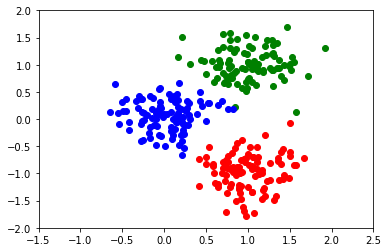

In [86]:
k = 3
# test with frobenius metric
# call the kmeans() function by parsing our toy data 'X', the # of clusters 'k',
# and flag we're using Frobenious norm as metric.
assignment, reps= kmeans(X, k, metric='frobenius')

#groups = [""" Problem #2; Fill in here. """ for i in range(len(X)) if assignment[i] == """ Problem #2; Fill in here. """] for j in range(k)]

# Or this normal for loop statement
groups = [] # list for the whole groups of length k
for j in range(k):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignment)):
        if assignment[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

# plot the result
plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in blue color for k=2
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*Wow!, our algorithm clusters our data into three group, similar to our initial guess from our intuition!*

# D.Test for the new clustering metric

### CAVEAT: You should implement the angle() function and complete some portion of kmeans() function in the *section B*. 
- You are asked to implement the function that computes angle between two vectors. Please refer to pseudo-code in *section C*.

___
*Now, let's change the metric to the angle between datapoint and the representative vectors.*

*You can again use our kmeans() function, and first fill out the angle() function then use it inside the kmeans().*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.4649694962878925
Iter: 1 Cost: 0.18958440538488072
Iter: 2 Cost: 0.18958440538488072


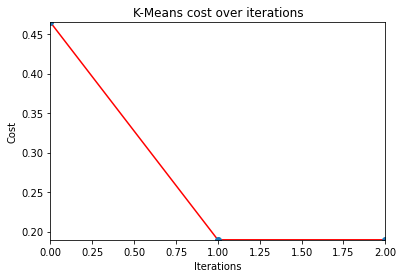

In [87]:
# cluster with k = 2, based on angle metric
k = 2
# 1) test with angle metric
assignment, reps = kmeans(X, k, metric='angle')

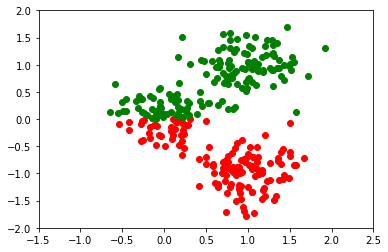

In [88]:
#groups = [""" Problem #3; Fill in here. """ for i in range(len(X)) if assignment[i] == """ Problem #3; Fill in here. """] for j in range(k)]

# Or this normal for loop statement
groups = [] # list for the whole groups of length k
for j in range(k):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignment)):
        if assignment[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*Hmm, looks weird... what about the $k=3$ setting?*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.4332250649205816
Iter: 1 Cost: 0.57155307312429
Iter: 2 Cost: 0.713904323609525
Iter: 3 Cost: 0.566323480639538
Iter: 4 Cost: 0.7396795262166784
Iter: 5 Cost: 0.5632819765381792
Iter: 6 Cost: 0.6581234411270994
Iter: 7 Cost: 0.5646277845155869
Iter: 8 Cost: 0.6414552080980528
Iter: 9 Cost: 0.5645981477982032
Iter: 10 Cost: 0.631843869964895
Iter: 20 Cost: 0.6288867083680145
Iter: 30 Cost: 0.6288867083680145
Iter: 40 Cost: 0.6288867083680145
Iter: 50 Cost: 0.6288867083680145
Iter: 60 Cost: 0.6288867083680145
Iter: 70 Cost: 0.6288867083680145
Iter: 80 Cost: 0.6288867083680145
Iter: 90 Cost: 0.6288867083680145
Reached max iteration, but could not satisfy the tolerance.


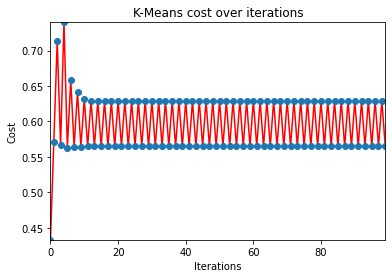

In [90]:
# cluster with k = 3, based on angle metric
k=3
# 1) test with angle metric
assignment, reps = kmeans(X, k, "angle")

((-1.5, 2.5), (-2.0, 2.0))

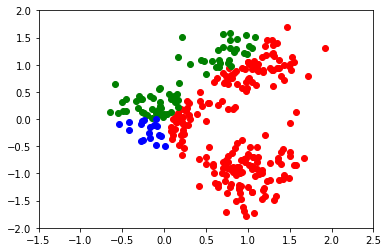

In [91]:
#groups = [""" Problem #3; Fill in here. """ for i in range(len(X)) if assignment[i] == """ Problem #3; Fill in here. """] for j in range(k)]

# Or this normal for loop statement
groups = [] # list for the whole groups of length k
for j in range(k):
    group_j = [] # create a group list for each representative j.
    # iterate over each data point i's assignment, and group them for each each representative j
    for i in range(len(assignment)):
        if assignment[i] == j:
            group_j.append(X[i]) # assort the data in X to each group.
    groups.append(group_j)

plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in blue color for k=2
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

*It turns out that angle metric does not perform well compared to the frobenious metric.*

# E.More challenging dataset, MNIST
### CAVEAT: If you have implemented the kmeans(), norm(), and angle() functions as our intent, a little modification of MNIST dataset should be 
### enough to test your algorithm on it.

- You might have heard about MNIST if you have an interest for the machine learning
- What's MNIST? : https://en.wikipedia.org/wiki/MNIST_database
- You (hopefully) can download the dataset directly from the Colab or Jupyternote book session by running the code block
If it doesn't work, please let us know via eTL's Q&A board.
___


*Now, let's prepare our MNIST dataset directly online.*

In [ ]:
# NOTE: In case the Tensorflow is not installed in your system, please uncomment the line below.
# NOTE: those who're working in the Colab may be already equipped with Tensorflow.
# ! pip install tensorflow==2.0.0
import tensorflow as tf
# Import tensorflow's MNIST data handle
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz') # mnist contains the numpy array of mnist dataset
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

*The variable 'mnist' is a dataset of 60,000 28X28 grayscale images of 10 digits, along with a test set of 10,000 images.*

*Its  data type is nested image & label tuples of train & test tuples of Numpy arrays:*

        tuple(
                tuple(x_train, y_train), 
                tuple(x_test, y_test),
        )



*In this assignment, we'll just use the **x_test** which consists of 10,000 grayscale images.
Also, as the experiments of section 4.4.1 of the textbook say,
we will cluster the data into $k=20$ clusters, i.e. set $k=20$ representatives.
*

*To do so, let's define the variable for our MNIST dataset and reshape it to fit our algorithm.*


In [ ]:
(_, _), (X, _) = mnist # In convention, we set the variable as '_' in case we won't use it.

# Get the shape of our numpy array of MNIST 'X'.
B, H, W = """ Problem #4; Fill in here. """ # (B=60000, H=28, W=28), NOTE: X is an numpy array

# Reshape the (28 * 28) gray scale MNIST image into 28^2 array. 
X = """ Problem #4; Fill in here. """ # represent each image is 784-dim vector. (10000, 784) 

ValueError: too many values to unpack (expected 3)

*If you have successfully reshaped the MNIST data variable **X** into shape of (Num of data, Vector dim), let's
feed this to our algorithm like before.*

### CAVEAT: Since we're dealing with tremendous number of samples, the optimization loop will take some time.

*First, cluster with the Frobenius norm metric.*

In [ ]:
k = 20

# cluster our MNIST data into 20 clusters, using Frobenius norm metric
assignment, reps = kmeans(""" Problem #4; Fill in here. """)

*Now, let's visualize the $k=20$ representative samples!*

In [ ]:
# NOTE: code for visualizing the clustred MNIST data
num_samples = k
num_col = k
num_row = 1

# plot images
# Hint: the reps[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col,2 * num_row))
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(reps[i].reshape(""" Problem #4; Fill in here. """), cmap='gray')
    ax.set_title('k={}'.format(i % 20))
plt.tight_layout()
plt.show()


NameError: name 'reps' is not defined

*Wow!, the representative samples, which are the mean vector of each cluster, look like actual data!*

*Then, let's check some samples for each representative $k$, if they look similar to each representative.*

In [ ]:
# NOTE: code for visualizing the clustred MNIST data.

samples_each = 5
num_col = k
num_row = samples_each
num_samples = k * samples_each

data_samples = []
for k in range(num_row * len(reps)):
    ind = k // 20
    inds = np.where(np.array(assignment) == k % 20)
    data_samples.append(X[inds[0][ind]])

# Hint: the data_samples[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_samples):
    ax = axes[i//num_col, i%num_col]
    if i % 20 == 0:
        data_samples
    ax.imshow(data_samples[i].reshape(""" Problem #4; Fill in here. """), cmap='gray')
    ax.set_title('k={}'.format(i % 20))
plt.tight_layout()
plt.show()

NameError: name 'reps' is not defined

*Each row shows the samples for each cluster that is represented by the data point we have visualized previously. 
We can see that the samples look similar to corresponding repsentative sample!
*

### results from the angle metric
### CAVEAT: This will NOT converge, just report the error log occured by the diverging cost.

*How about the clustered sampels optimized from angle metric?*

In [ ]:
k = 20
# cluster our MNIST data into 20 clusters, using angle norm metric
assignment, reps = kmeans(""" Problem #4; Fill in here. """)
# assignment: len N list of cluster indices; reps: len n list of representive vectors
num_samples = 20
num_col = 20
num_row = 1

# plot images
# Hint: the reps[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_samples):
    # ax = axes[i//num_col, i%num_col]
    ax = axes[i]
    ax.imshow(reps[i].reshape(""" Problem #4; Fill in here. """), cmap='gray')
    ax.set_title('k={}'.format(i))
plt.tight_layout()
plt.show()


NameError: name 'kmeans' is not defined

*Ouch,... we get the error, since the cost functon has diverged to infinity...
Thus, it seems like angle is not a proper metric for naive implementation of K-means clustering.
*